# KOI-142 Visualization of Results
The following code is used to create figures to visualize how TESS in conjunction with Kepler improves our knowledge of KOI-142

See KOI_142_Analysis.py file for important chains used in the following code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

g_value = 0.000295994511
M_star = 0.956

In [2]:
plt.rcParams['axes.linewidth']=3
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rc('xtick.major', size=8, pad=8)
plt.rc('xtick.minor', size=6, pad=5)
plt.rc('ytick.major', size=8, pad=8)
plt.rc('ytick.minor', size=6, pad=5)

In [3]:
#chains from KOI_142_analysis.py
c = np.load('sampler_chains2.npy')
tess_chains = np.load('sampler_chains2_tess.npy')

In [4]:
#creating an array of dates starting from 2009 until 2028
time_array28 = np.zeros(shape=(641,))
for time28 in range(len(time_array28)):
    if (time28==0):
        time_array28[time28] = 2009.25
    else:
        time_array28[time28] = time_array28[time28-1] + 10.915996767 / 365

In [5]:
#initializing arrays
chain_transits28 = np.zeros(shape=(1500000, 641)) 
tess_chain_transits28 = np.zeros(shape=(1500000, 641))

In [6]:
'''
Calculates transit times 
Input:
    full_chain (array of chains from MCMC analysis)
    specific_chains (tuple, which chains to include in analysis out of full_chain)
    ending_date (int, which date to end analysis, in this case our ending date is 2028)
Output:
    transit times
'''
def calc_transit_times(full_chain, specific_chains, ending_date):
    params = full_chain[specific_chains[0], specific_chains[1], :]
    filename = ("/Users/Callista/Documents/GitHub/infiles2/TTVs0.in")
    infile = open(filename, 'w')
    infile.write("%.11f\n%.11f\n%.11f\n" % (g_value, M_star, params[0]))
    infile.write("%.11f %.11f %.11f %.11f %.11f %.11f\n" % (params[1], params[2], params[3], 0.0, params[4], params[5]))
    infile.write("%.11f\n" % params[6])
    infile.write("%.11f %.11f %.11f %.11f %.11f %.11f\n" % (params[7], params[8], params[9], params[11], params[10], params[12]))
    infile.close()
    
    #creating/writing setup file
    setupfilename = ("/Users/Callista/Documents/Github/setupfiles2/new_setupfile0")
    new_setupfile = open(setupfilename, 'w')
    new_setupfile.write("%s\n %.8f\n %.3f\n %d\n %d\n %d\n" % (filename, 54.675215, 0.54, ending_date, 2, 0))
    new_setupfile.close()
    os.system(("./run_TTVFast" + " " + setupfilename + " /Users/Callista/Documents/Github/KOI142_files2/final_files0" + " RV_file RV_out"))
    
    transit_times_file = np.loadtxt("/Users/Callista/Documents/Github/KOI142_files2/final_files0")
    
    planet = transit_times_file[:,0]
    epoch = transit_times_file[:,1]
    time = transit_times_file[:,2]
        
    planet_1 = planet[planet == 0]
    epoch_1 = epoch[planet == 0]
    time_1 = time[planet == 0]
    time_1 += 0./1440
    return time_1

In [ ]:
#stepping through each set of parameters in the array of chains and calculating transit times until 2028 for each set of parameters
#takes all of the possible sets of transits based on the given sets of parameters and inputs these times into a new array
ind_time = 0 
for i in range(len(c)):
    for j in range(len(c[0])):
        ttr = calc_transit_times(c, (i, j), 7067)
        tess_transits = calc_transit_times(tess_chains, (i, j), 7067)
        chain_transits28[ind_time] = ttr
        tess_chain_transits28[ind_time] = tess_transits   
        ind_time+=1

In [ ]:
#finds the standard deviation of the transit times (column of array)
#given a specific time, std_array2 and std_array will be our uncertainity in the transit times with and without TESS, respectively
std_array = np.std(chain_transits28, axis=0)*1440
std_array2 = np.std(tess_chain_transits28, axis=0)*1440

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

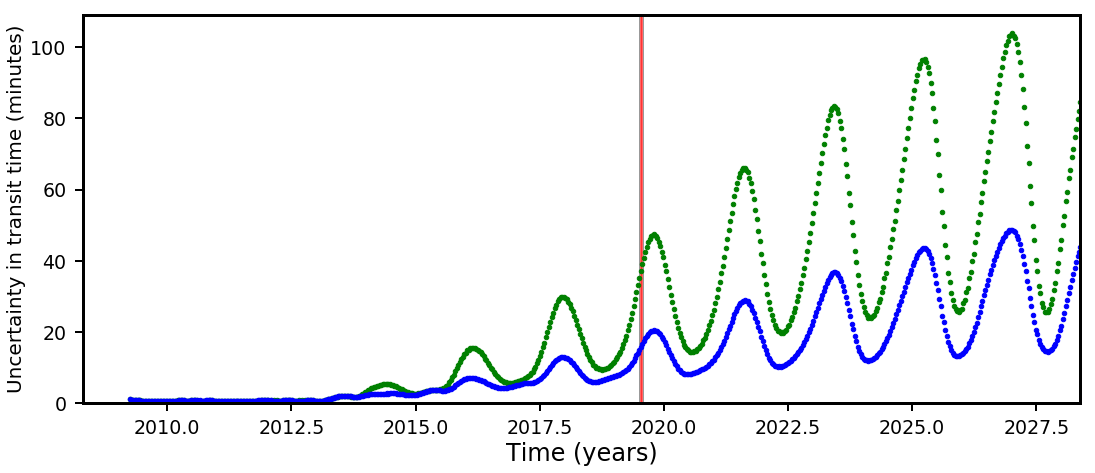

In [7]:
#plot figure
std_array = np.load("std_array.npy")
std_array2 = np.load("std_array2.npy")

plt.figure(figsize=(18,7))
plt.gcf().subplots_adjust(left=0.17, bottom=0.17, right=0.94, top=0.94, wspace=0.0, hspace=0.0)

#vertical line represents July 2019, when TESS will most likely observe KOI-142
plt.axvline(x=2019.54166667, linewidth=2.5, color='r', alpha=0.8)
plt.axvline(x=2019.5, linewidth=0.5, color='k', alpha=0.8)
plt.axvline(x=2019.583333333, linewidth=0.5, color='k', alpha=0.8)
plt.plot(time_array28, std_array, 'g.', time_array28, std_array2, 'b.', markersize=9)

plt.gcf().subplots_adjust(left=0.17, bottom=0.17, right=0.94, top=0.94, wspace=0.0, hspace=0.0)
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(right=np.max(time_array28))

plt.xlabel('Time (years)', fontsize=24)
plt.ylabel('Uncertainty in transit time (minutes)', fontsize=20)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
#plt.savefig('final_transit_uncert_new.pdf', bbox_inches='tight')

In [8]:
#final plot of KOI-142's TTVs (observed - calculated transit times), where calculated are transit times based on a constant period model

#initalizing time array (until 2020)
time_array = np.zeros(shape=(356,))
for jj in range(len(time_array)):
    if (jj==0):
        time_array[jj] = 2009.25
    else:
        time_array[jj] = time_array[jj-1] + 10.915996767 / 365

In [ ]:
#calculating transit times until 2020        
array_of_times = np.zeros(shape=(1500000, 356))
index_time = 0
for i in range(len(c)):
    for j in range(len(c[0])):
        ttr = calc_transit_times(c, (i, j), 3950)
        array_of_times[index_time] = ttr
        index_time += 1
np.save('time_array', array_of_times)

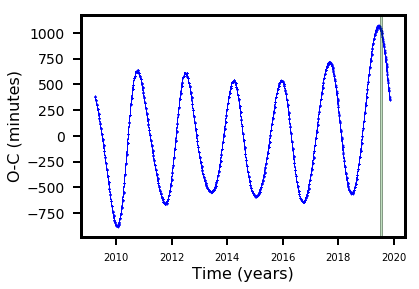

In [18]:
#choosing 40 chains to plot at random, convert transit times to minutes
array_of_times = np.load("time_array.npy")
random_tot = np.random.randint(low=0, high=1500000, size=100)
epoch_1 = np.arange(0, 356, 1, dtype=float)

for kk in range(len(random_tot)): 
    times = array_of_times[kk]
    OC = np.zeros((356))
    for mm in range(356):
        OC[mm] = times[mm] - 10.915996767*epoch_1[mm] - 0.03595719*epoch_1[mm]
    plt.plot(time_array, (OC-np.mean(OC))*1440, 'b.', markersize=0.3, linestyle='solid', linewidth=0.1, alpha=0.8)

plt.axvline(x=2019.536985, linewidth=3, color='g', alpha=0.25)
plt.axvline(x=2019.5, linewidth=0.5, color='k', alpha=0.6)
plt.axvline(x=2019.57397, linewidth=0.5, color='k', alpha=0.6) 
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('O-C (minutes)', fontsize=16)
#plt.xticks([2019.25, 2019.25+(1/12.0), 2019.25+(2/12.0), 2019.5, 2019.5+(1/12.0), 2019.5+(2/12.0)], ['1 Apr', '1 May', '1 Jun', '1 Jul', '1 Aug', '1 Sep'], fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().subplots_adjust(left=0.19, bottom=0.17, right=0.94, top=0.94, wspace=0.0, hspace=0.0)
plt.savefig("kepler_transitsOC_min_band.pdf")
plt.show()